In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

/home/tek2991/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment-3_class_UKG.xlsx');
df2 = pd.read_excel('Formative Assessment -4_class_UKG.xlsx');
df3 = pd.read_excel('Annual Exam-2023_class_UKG.xlsx');

# In df1, where the Full Mark is not 25, multuply the Full Mark, Pass Mark and Marks Secured by 25/Full Mark
# df1.loc[df1['Full Mark']!=25, 'Pass Mark'] = df1['Pass Mark']*25/df1['Full Mark'];
# df1.loc[df1['Full Mark']!=25, 'Marks Secured'] = df1['Marks Secured']*25/df1['Full Mark'];
# df1.loc[df1['Full Mark']!=25, 'Full Mark'] = df1['Full Mark']*25/df1['Full Mark'];

# In df2, where the Full Mark is not 25, multuply the Full Mark, Pass Mark and Marks Secured by 25/Full Mark
# df2.loc[df2['Full Mark']!=25, 'Pass Mark'] = df2['Pass Mark']*25/df2['Full Mark'];
# df2.loc[df2['Full Mark']!=25, 'Marks Secured'] = df2['Marks Secured']*25/df2['Full Mark'];
# df2.loc[df2['Full Mark']!=25, 'Full Mark'] = df2['Full Mark']*25/df2['Full Mark'];

# In df3, where the Full Mark is not 50, multuply the Full Mark, Pass Mark and Marks Secured by 50/Full Mark
# df3.loc[df3['Full Mark']!=50, 'Pass Mark'] = df3['Pass Mark']*50/df3['Full Mark'];
# df3.loc[df3['Full Mark']!=50, 'Marks Secured'] = df3['Marks Secured']*50/df3['Full Mark'];
# df3.loc[df3['Full Mark']!=50, 'Full Mark'] = df3['Full Mark']*50/df3['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment-3,Offline,Oral Maths,Evaluating,10,3,0 %,Rupam Sukla,UKG,A,1,8.0,Pass
1,2022-2023,Formative Assessment-3,Offline,Rhymes,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,0.0,Fail
2,2022-2023,Formative Assessment-3,Offline,English,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,19.0,Pass
3,2022-2023,Formative Assessment-3,Offline,Oral Hindi,Evaluating,10,3,0 %,Rupam Sukla,UKG,A,1,10.0,Pass
4,2022-2023,Formative Assessment-3,Offline,Drawing,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,0.0,Fail


In [3]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  18
Student names with value 0 in marks secured column:  ['Rupam Sukla' 'Md.Sanawaj' 'Niraj pradhan' 'Aditi Kalita' 'Jiya Rongpi'
 'Rahul kr.Nayak']


In [4]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [5]:
# print the number of subjects
print('Number of Subjects: ', len(subjects));
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));

# print the number of exams
print('Number of Exams: ', len(exams));

Number of Subjects:  9
Subjects:  ['Oral Maths' 'Rhymes' 'English' 'Oral Hindi' 'Drawing' 'Maths'
 'Oral English' 'Hindi' 'EVS']
Number of Students:  18
Number of Exams:  3


In [6]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Rupam Sukla,UKG,A,1.0
1,Ipsita Das,UKG,A,2.0
2,Md.Sanawaj,UKG,A,3.0
3,Ayushi kundu,UKG,A,4.0
4,Jiya Rongpi,UKG,A,5.0


In [7]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Rhymes,Formative Assessment-3_Rhymes_total,Formative Assessment-3_Rhymes_pass,...,Annual Exam-2023_Maths_pass,Annual Exam-2023_Oral English,Annual Exam-2023_Oral English_total,Annual Exam-2023_Oral English_pass,Annual Exam-2023_Hindi,Annual Exam-2023_Hindi_total,Annual Exam-2023_Hindi_pass,Annual Exam-2023_EVS,Annual Exam-2023_EVS_total,Annual Exam-2023_EVS_pass
0,Rupam Sukla,UKG,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ipsita Das,UKG,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Md.Sanawaj,UKG,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ayushi kundu,UKG,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Jiya Rongpi,UKG,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Rhymes,Formative Assessment-3_Rhymes_total,Formative Assessment-3_Rhymes_pass,...,Annual Exam-2023_Maths_pass,Annual Exam-2023_Oral English,Annual Exam-2023_Oral English_total,Annual Exam-2023_Oral English_pass,Annual Exam-2023_Hindi,Annual Exam-2023_Hindi_total,Annual Exam-2023_Hindi_pass,Annual Exam-2023_EVS,Annual Exam-2023_EVS_total,Annual Exam-2023_EVS_pass
0,Rupam Sukla,UKG,A,1.0,8,10,3,0,25,7,...,15,30,30,9,49.0,50,15,43.0,50,15
1,Ipsita Das,UKG,A,2.0,9,10,3,25,25,7,...,15,24,30,9,49.0,50,15,49.5,50,15
2,Md.Sanawaj,UKG,A,3.0,0,10,3,6,25,7,...,15,12,30,9,15.0,50,15,7.5,50,15
3,Ayushi kundu,UKG,A,4.0,9,10,3,25,25,7,...,15,25,30,9,49.0,50,15,45.0,50,15
4,Jiya Rongpi,UKG,A,5.0,7,10,3,13,25,7,...,15,18,30,9,36.0,50,15,31.5,50,15


In [9]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Rhymes,Formative Assessment-3_Rhymes_total,Formative Assessment-3_Rhymes_pass,...,Annual Exam-2023_EVS_pass,Weightage Oral Maths,Weightage Rhymes,Weightage English,Weightage Oral Hindi,Weightage Drawing,Weightage Maths,Weightage Oral English,Weightage Hindi,Weightage EVS
0,Rupam Sukla,UKG,A,1.0,8,10,3,0,25,7,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ipsita Das,UKG,A,2.0,9,10,3,25,25,7,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Md.Sanawaj,UKG,A,3.0,0,10,3,6,25,7,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ayushi kundu,UKG,A,4.0,9,10,3,25,25,7,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jiya Rongpi,UKG,A,5.0,7,10,3,13,25,7,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = round(df_new['Formative Assessment-3_' + subject] * 1 + df_new['Formative Assessment -4_' + subject] * 1 + df_new['Annual Exam-2023_' + subject] * 1, 2);
    # Calculate the full weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment-3_' + subject + '_total'] * 1 + df_new['Formative Assessment -4_' + subject + '_total'] * 1 + df_new['Annual Exam-2023_' + subject + '_total'] * 1;

# save to excel
df_new.to_excel('output.xlsx', index=False);

/tmp/ipykernel_11415/1640216767.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment-3_' + subject + '_total'] * 1 + df_new['Formative Assessment -4_' + subject + '_total'] * 1 + df_new['Annual Exam-2023_' + subject + '_total'] * 1;


In [11]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

/tmp/ipykernel_11415/717132809.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');


In [12]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

/tmp/ipykernel_11415/106921885.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Total Weightage'] = 0;


,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Rhymes,Formative Assessment-3_Rhymes_total,Formative Assessment-3_Rhymes_pass,...,Result Oral Maths,Result Rhymes,Result English,Result Oral Hindi,Result Drawing,Result Maths,Result Oral English,Result Hindi,Result EVS,Total Weightage
0,Rupam Sukla,UKG,A,1.0,8,10,3,0,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,581.0
1,Ipsita Das,UKG,A,2.0,9,10,3,25,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,723.5
2,Md.Sanawaj,UKG,A,3.0,0,10,3,6,25,7,...,Pass,Fail,Fail,Pass,Pass,Fail,Pass,Pass,Fail,195.7
3,Ayushi kundu,UKG,A,4.0,9,10,3,25,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,646.5
4,Jiya Rongpi,UKG,A,5.0,7,10,3,13,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,443.0


In [13]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

/tmp/ipykernel_11415/19931101.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result'] = '';


In [14]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False, method='min');

In [15]:
# Print the first row
df_new.iloc[0]

Student Name                         Rupam Sukla
Class                                        UKG
Section                                        A
Roll No                                      1.0
Formative Assessment-3_Oral Maths              8
                                        ...     
Total Weightage                            581.0
Result                                      Pass
Total Marks                                  750
Percentage                             77.466667
Rank                                        10.0
Name: 0, Length: 117, dtype: object

In [16]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Rhymes,Formative Assessment-3_Rhymes_total,Formative Assessment-3_Rhymes_pass,...,Result Drawing,Result Maths,Result Oral English,Result Hindi,Result EVS,Total Weightage,Result,Total Marks,Percentage,Rank
0,Rupam Sukla,UKG,A,1.0,8,10,3,0,25,7,...,Pass,Pass,Pass,Pass,Pass,581.0,Pass,750,77.466667,10.0
1,Ipsita Das,UKG,A,2.0,9,10,3,25,25,7,...,Pass,Pass,Pass,Pass,Pass,723.5,Pass,750,96.466667,2.0
2,Md.Sanawaj,UKG,A,3.0,0,10,3,6,25,7,...,Pass,Fail,Pass,Pass,Fail,195.7,Fail,750,26.093333,18.0
3,Ayushi kundu,UKG,A,4.0,9,10,3,25,25,7,...,Pass,Pass,Pass,Pass,Pass,646.5,Pass,750,86.200000,5.0
4,Jiya Rongpi,UKG,A,5.0,7,10,3,13,25,7,...,Pass,Pass,Pass,Pass,Pass,443.0,Pass,750,59.066667,13.0
5,Niraj pradhan,UKG,A,6.0,0,10,3,13,25,7,...,Pass,Pass,Pass,Pass,Fail,350.0,Pass,750,46.666667,17.0
6,Anushka Brijbashi,UKG,A,7.0,7,10,3,18,25,7,...,Pass,Pass,Pass,Pass,Pass,590.5,Pass,750,78.733333,9.0
7,Ringchen Tamang,UKG,A,8.0,9,10,3,25,25,7,...,Pass,Pass,Pass,Pass,Pass,701.0,Pass,750,93.466667,3.0
8,Andrea Hazarika,UKG,A,9.0,10,10,3,25,25,7,...,Pass,Pass,Pass,Pass,Pass,692.0,Pass,750,92.266667,4.0
9,Franki Islam,UKG,A,10.0,3,10,3,5,25,7,...,Pass,Pass,Pass,Pass,Pass,399.5,Pass,750,53.266667,16.0


In [17]:
# Export the dataframe to excel
df_new.to_excel('Result_Final.xlsx', index=False);

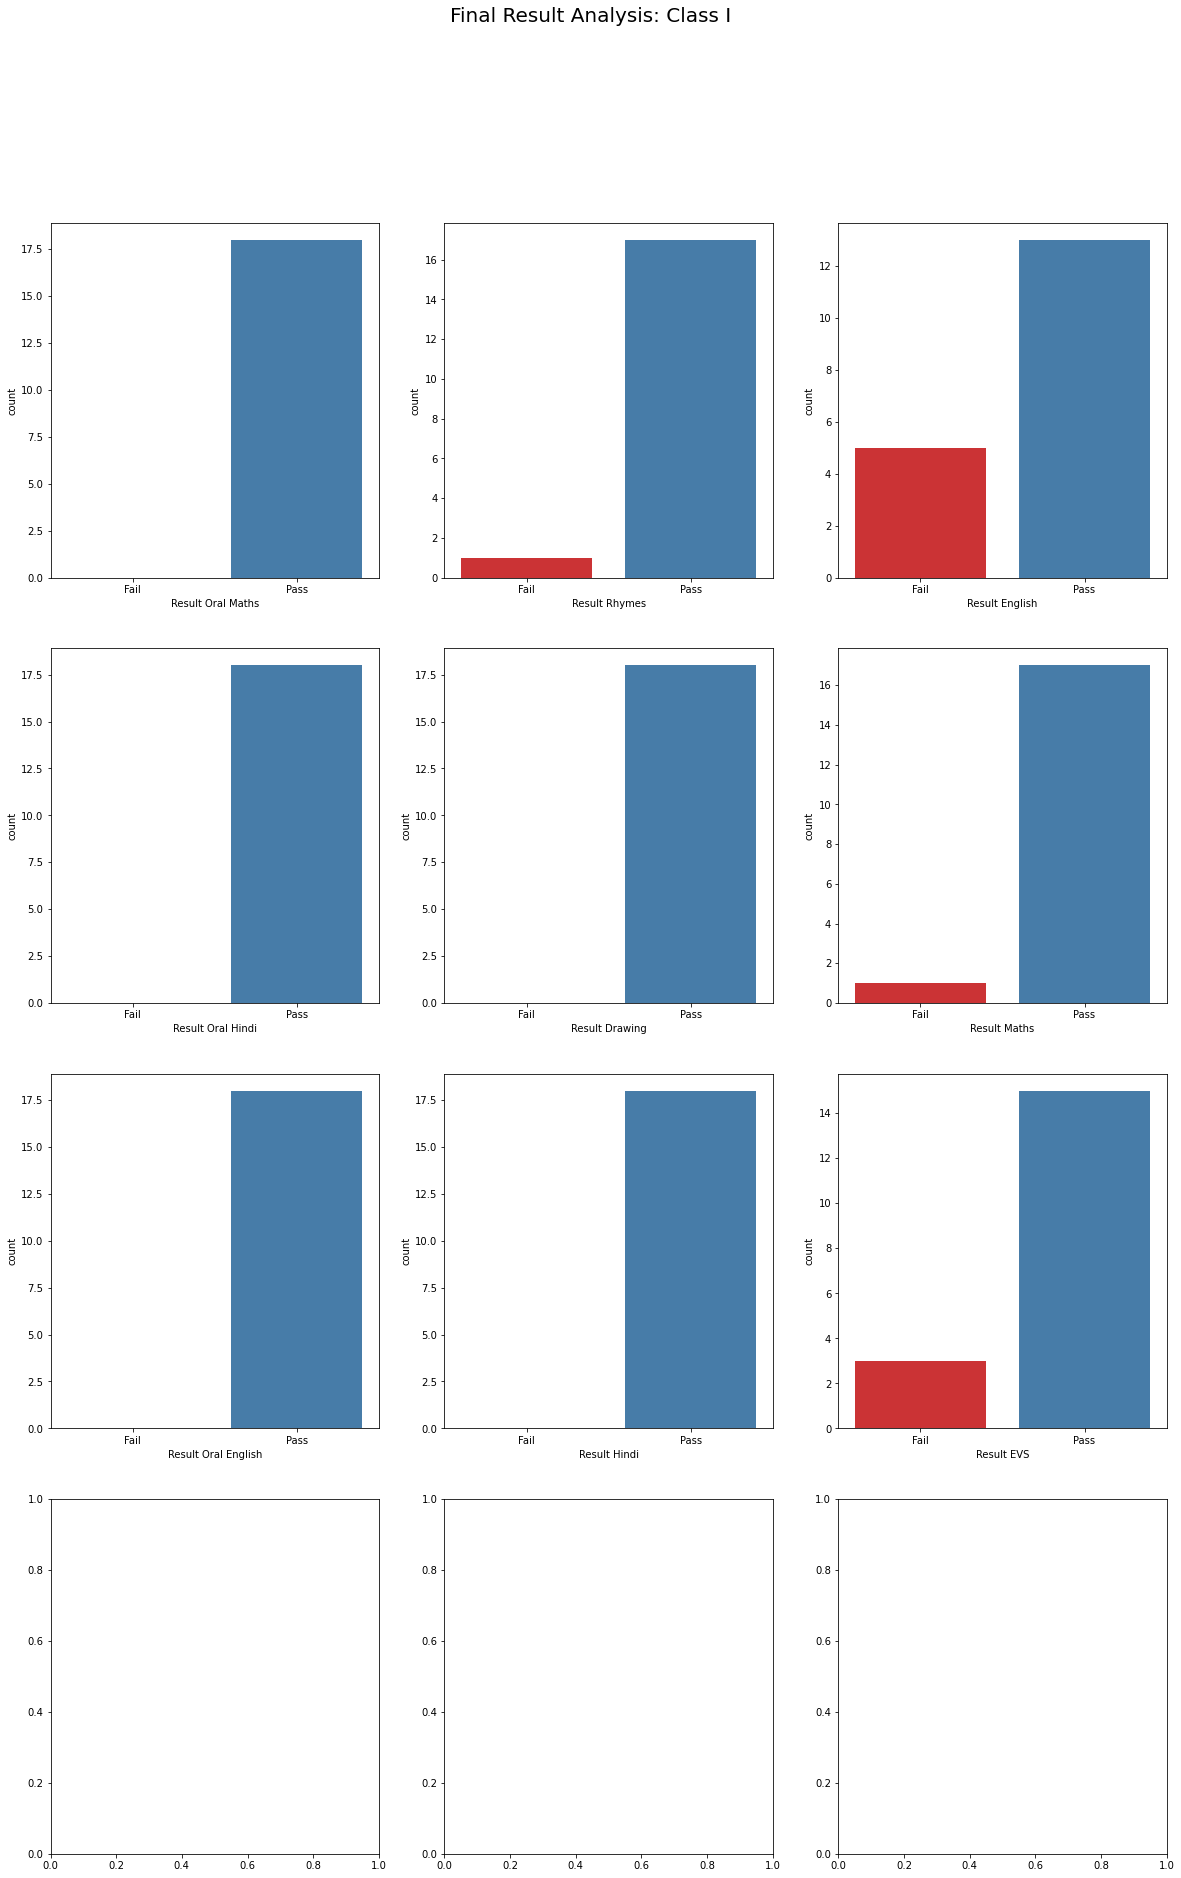

In [18]:
# Combine the charts in one figure
fig, axes = plt.subplots(4, 3, figsize=(20, 30));

# Set the title of the figure
fig.suptitle('Final Result Analysis: Class I', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();